In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

**Datos Movimiento de taxis NYC.**<br>

**TLC Monthy Report.**<br>
https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [3]:
industry_metrics = pd.read_csv("https://www1.nyc.gov/assets/tlc/downloads/csv/data_reports_monthly.csv")

In [4]:
industry_metrics

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2023-02,Yellow,"103,632","2,440,137","10,762","7,886","6,679",23.7,8.4,20.2,7.2,14.7,82%,-
1,2023-02,FHV - Black Car,"16,357",-,"6,189","6,137","2,775",12.7,4.6,12.7,4.6,28,-,-
2,2023-02,FHV - High Volume,"641,461",-,"77,137","74,404","53,180",20.0,6.6,19.7,6.4,18,-,"10,811"
3,2023-02,FHV - Livery,"18,474",-,"4,619","4,439","2,820",17.8,4.9,17.5,4.8,19,-,-
4,2023-02,FHV - Lux Limo,"1,077",-,"1,190","1,148",493,12.0,2.2,12.0,2.1,63,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,2010-05,Yellow,"499,374","5,561,218","30,950","13,309","12,729",29.6,14.8,22.7,8.3,-,35%,-
661,2010-04,Yellow,"504,798","5,502,545","30,827","13,326","12,856",28.9,14.8,22.3,8.3,-,35%,-
662,2010-03,Yellow,"415,567","3,011,750","28,709","12,183","10,382",26.4,15.1,20.4,8.3,11.5,35%,-
663,2010-02,Yellow,"397,969","3,392,416","28,255","12,171","10,045",23.1,14.6,17.6,8.3,11.1,35%,-


Convert column names to lowercase

In [5]:
industry_metrics.columns = industry_metrics.columns.str.lower()
industry_metrics.columns

Index(['month/year', 'license class',
       '               trips per day               ',
       '               farebox per day               ',
       '                unique drivers                ',
       '                unique vehicles                ',
       '                vehicles per day                ',
       '           avg days vehicles on road           ',
       '           avg hours per day per vehicle           ',
       '           avg days drivers on road           ',
       '           avg hours per day per driver           ',
       '           avg minutes per trip           ',
       'percent of trips paid with credit card', ' trips per day shared '],
      dtype='object')

In [6]:
industry_metrics.columns = [col.strip() for col in industry_metrics.columns]

In [7]:
industry_metrics.columns

Index(['month/year', 'license class', 'trips per day', 'farebox per day',
       'unique drivers', 'unique vehicles', 'vehicles per day',
       'avg days vehicles on road', 'avg hours per day per vehicle',
       'avg days drivers on road', 'avg hours per day per driver',
       'avg minutes per trip', 'percent of trips paid with credit card',
       'trips per day shared'],
      dtype='object')

In [8]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   month/year                              665 non-null    object 
 1   license class                           665 non-null    object 
 2   trips per day                           665 non-null    object 
 3   farebox per day                         661 non-null    object 
 4   unique drivers                          665 non-null    object 
 5   unique vehicles                         665 non-null    object 
 6   vehicles per day                        665 non-null    object 
 7   avg days vehicles on road               665 non-null    float64
 8   avg hours per day per vehicle           665 non-null    float64
 9   avg days drivers on road                665 non-null    float64
 10  avg hours per day per driver            665 non-null    float6

Remove "%" and Convert percent_of_trips_paid_with_credit_card to numeric

In [9]:
industry_metrics['percent of trips paid with credit card'] = industry_metrics['percent of trips paid with credit card'].replace({'%': '','-':''}, regex=True) #.astype(float)
industry_metrics['percent of trips paid with credit card'] = pd.to_numeric(industry_metrics['percent of trips paid with credit card'], errors='coerce') / 100
industry_metrics['percent of trips paid with credit card'] = industry_metrics['percent of trips paid with credit card'].fillna(0.0)
industry_metrics['percent of trips paid with credit card']

0      0.82
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
660    0.35
661    0.35
662    0.35
663    0.35
664    0.32
Name: percent of trips paid with credit card, Length: 665, dtype: float64

Create month_year and drop month/year column

In [10]:
industry_metrics["date"] = pd.to_datetime(industry_metrics["month/year"], format="%Y/%m").dt.strftime('%Y-%m')
industry_metrics.drop(columns=["month/year"], inplace=True)
industry_metrics["date"]

0      2023-02
1      2023-02
2      2023-02
3      2023-02
4      2023-02
        ...   
660    2010-05
661    2010-04
662    2010-03
663    2010-02
664    2010-01
Name: date, Length: 665, dtype: object

convert columns to numeric

In [11]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license class                           665 non-null    object 
 1   trips per day                           665 non-null    object 
 2   farebox per day                         661 non-null    object 
 3   unique drivers                          665 non-null    object 
 4   unique vehicles                         665 non-null    object 
 5   vehicles per day                        665 non-null    object 
 6   avg days vehicles on road               665 non-null    float64
 7   avg hours per day per vehicle           665 non-null    float64
 8   avg days drivers on road                665 non-null    float64
 9   avg hours per day per driver            665 non-null    float64
 10  avg minutes per trip                    665 non-null    object

In [12]:
industry_metrics.columns

Index(['license class', 'trips per day', 'farebox per day', 'unique drivers',
       'unique vehicles', 'vehicles per day', 'avg days vehicles on road',
       'avg hours per day per vehicle', 'avg days drivers on road',
       'avg hours per day per driver', 'avg minutes per trip',
       'percent of trips paid with credit card', 'trips per day shared',
       'date'],
      dtype='object')

In [13]:
industry_metrics['trips per day'] = industry_metrics['trips per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['trips per day']

0      103632
1       16357
2      641461
3       18474
4        1077
        ...  
660    499374
661    504798
662    415567
663    397969
664    479376
Name: trips per day, Length: 665, dtype: int32

In [14]:
industry_metrics.head()

,license class,trips per day,farebox per day,unique drivers,unique vehicles,vehicles per day,avg days vehicles on road,avg hours per day per vehicle,avg days drivers on road,avg hours per day per driver,avg minutes per trip,percent of trips paid with credit card,trips per day shared,date
0,Yellow,103632,"2,440,137","10,762","7,886","6,679",23.7,8.4,20.2,7.2,14.7,0.82,-,2023-02
1,FHV - Black Car,16357,-,"6,189","6,137","2,775",12.7,4.6,12.7,4.6,28,0.00,-,2023-02
2,FHV - High Volume,641461,-,"77,137","74,404","53,180",20.0,6.6,19.7,6.4,18,0.00,"10,811",2023-02
3,FHV - Livery,18474,-,"4,619","4,439","2,820",17.8,4.9,17.5,4.8,19,0.00,-,2023-02
4,FHV - Lux Limo,1077,-,"1,190","1,148",493,12.0,2.2,12.0,2.1,63,0.00,-,2023-02


In [15]:
industry_metrics['farebox per day'].unique()

array([' 2,440,137 ', ' - ', ' 46,204 ', '43,733', '2,335,375', '45,208',
       '2,358,924', '35,984', '2,088,897', '  -  ', '2,293,014', '39,960',
       '   -   ', '2,100,507', '43,814', '    -    ', '38,915',
       '1,918,370', '     -     ', '1,921,789', '37,356', '2,057,705',
       '44,572', '44,850', '2,234,977', '        -        ',
       '         -         ', '2,219,127', '43,591',
       '          -           ', '42,436', '2,097,334', '40,475',
       '          -          ', '1,805,865', '1,330,596',
       '           -           ', '32,510', '1,903,870',
       '            -            ', '70,840', '2,103,014', '82,076',
       '             -             ', '              -              ',
       '1,993,228', '82,093', '               -               ', '77,261',
       '1,826,391', '1,611,851', '63,670', '63,047', '1,605,062',
       '65,833', '1,607,814', '65,575', '1,340,447', '67,873',
       '1,182,789', '62,408', '979,149',
       '                -           

In [16]:
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].apply(lambda x: x.strip() if isinstance(x, str) else x)
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].replace('-', '0')
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].fillna('0')
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['farebox per day'] = pd.to_numeric(industry_metrics['farebox per day'])
industry_metrics['farebox per day']

0      2440137
1            0
2            0
3            0
4            0
        ...   
660    5561218
661    5502545
662    3011750
663    3392416
664    4968817
Name: farebox per day, Length: 665, dtype: int32

In [17]:
industry_metrics['unique drivers'] = industry_metrics['unique drivers'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['unique drivers']

0      10762
1       6189
2      77137
3       4619
4       1190
       ...  
660    30950
661    30827
662    28709
663    28255
664    30659
Name: unique drivers, Length: 665, dtype: int32

In [18]:
industry_metrics['unique vehicles'] = industry_metrics['unique vehicles'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['unique vehicles']

0       7886
1       6137
2      74404
3       4439
4       1148
       ...  
660    13309
661    13326
662    12183
663    12171
664    13305
Name: unique vehicles, Length: 665, dtype: int32

In [19]:
industry_metrics['vehicles per day'] = industry_metrics['vehicles per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['vehicles per day']

0       6679
1       2775
2      53180
3       2820
4        493
       ...  
660    12729
661    12856
662    10382
663    10045
664    12727
Name: vehicles per day, Length: 665, dtype: int32

In [20]:
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].apply(lambda x: x.strip().replace('-',''))
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].fillna('0')
industry_metrics['avg minutes per trip'] = pd.to_numeric(industry_metrics['avg minutes per trip'])
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].fillna(0.0)
industry_metrics['avg minutes per trip']

0      14.7
1      28.0
2      18.0
3      19.0
4      63.0
       ... 
660     0.0
661     0.0
662    11.5
663    11.1
664     0.0
Name: avg minutes per trip, Length: 665, dtype: float64

In [21]:
industry_metrics['trips per day shared'].unique()

array(['-', ' 10,811 ', '9,998', ' -   ', '10,672', ' - ', '9,336',
       '3,573', '443', '466', '853', '133', '277', '716', '723', '635',
       '124', '  -  ', '41,051', '97,117', '90,550', '93,421', '103,379',
       '107,676', '107,780', '104,983', '104,074', '101,645', '124,106',
       '141,734', '157,704', '171,912', nan, '104', '157,678', '30',
       '128', '164,666', '35', '17,734', '160,672', '36', '158',
       '176,348', '34', '291', '148,283', '16', '168,299', '15', '13',
       '163,171', '18', '143,298', '148,036', '160,806', '14', '157,162',
       '12', '140,622', '19', '126,738', '118,649', '107,750', '92,641',
       '84,200', '76,026', '6', '68,756', '63,620'], dtype=object)

In [22]:
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].apply(lambda x: x.strip() if isinstance(x, str) else x)
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].fillna('0')
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].replace({'-':'0',',':''}, regex=True)
industry_metrics['trips per day shared'] = pd.to_numeric(industry_metrics['trips per day shared'])
industry_metrics['trips per day shared'].unique()

array([     0,  10811,   9998,  10672,   9336,   3573,    443,    466,
          853,    133,    277,    716,    723,    635,    124,  41051,
        97117,  90550,  93421, 103379, 107676, 107780, 104983, 104074,
       101645, 124106, 141734, 157704, 171912,    104, 157678,     30,
          128, 164666,     35,  17734, 160672,     36,    158, 176348,
           34,    291, 148283,     16, 168299,     15,     13, 163171,
           18, 143298, 148036, 160806,     14, 157162,     12, 140622,
           19, 126738, 118649, 107750,  92641,  84200,  76026,      6,
        68756,  63620], dtype=int64)

In [23]:
# convert column names to lowercase and replace spaces with underscores
industry_metrics.columns = industry_metrics.columns.str.lower().str.replace(" ", "_")
industry_metrics.columns 

Index(['license_class', 'trips_per_day', 'farebox_per_day', 'unique_drivers',
       'unique_vehicles', 'vehicles_per_day', 'avg_days_vehicles_on_road',
       'avg_hours_per_day_per_vehicle', 'avg_days_drivers_on_road',
       'avg_hours_per_day_per_driver', 'avg_minutes_per_trip',
       'percent_of_trips_paid_with_credit_card', 'trips_per_day_shared',
       'date'],
      dtype='object')

In [24]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license_class                           665 non-null    object 
 1   trips_per_day                           665 non-null    int32  
 2   farebox_per_day                         665 non-null    int32  
 3   unique_drivers                          665 non-null    int32  
 4   unique_vehicles                         665 non-null    int32  
 5   vehicles_per_day                        665 non-null    int32  
 6   avg_days_vehicles_on_road               665 non-null    float64
 7   avg_hours_per_day_per_vehicle           665 non-null    float64
 8   avg_days_drivers_on_road                665 non-null    float64
 9   avg_hours_per_day_per_driver            665 non-null    float64
 10  avg_minutes_per_trip                    665 non-null    float6

Create new columns

In [25]:
industry_metrics['month_year1'] = pd.to_datetime(industry_metrics['date']).dt.to_period('M')
industry_metrics['days'] = pd.to_datetime(industry_metrics['month_year1'].astype(str) + '-01').dt.daysinmonth
industry_metrics['trips_per_month'] = industry_metrics['trips_per_day'] * industry_metrics['days']
industry_metrics['month_date'] = pd.to_datetime(industry_metrics['date'] + '-28')
industry_metrics['farebox_per_month'] = industry_metrics['farebox_per_day'] * industry_metrics['days']
industry_metrics['week'] = pd.to_datetime(industry_metrics['month_date']).dt.strftime('%W').astype('category')
industry_metrics['trips_per_week'] = industry_metrics['trips_per_day'] * 7
industry_metrics['year'] = pd.to_datetime(industry_metrics['date']).dt.strftime('%Y')
industry_metrics['farebox_per_week'] = industry_metrics['farebox_per_day'] * 7
industry_metrics['license_class'] = industry_metrics['license_class'].astype('category')
industry_metrics['total_trips_per_day'] = industry_metrics['trips_per_day'] + industry_metrics['trips_per_day_shared']
industry_metrics['shared_trips_per_day_percent'] = round(industry_metrics['trips_per_day_shared'] / industry_metrics['total_trips_per_day'], 2)

Copy for compatibility with old code

In [26]:
industry_metrics = industry_metrics.copy()

In [27]:
# remove the 'days' column
industry_metrics.drop(columns=["days"], inplace=True)


In [28]:
# reorder rows by 'license_class' and 'month_date'
industry_metrics = industry_metrics.sort_values(by=["license_class", "month_date"], ascending=[True, True])
industry_metrics = industry_metrics.set_index('month_date')
industry_metrics=industry_metrics.reset_index()
industry_metrics

,month_date,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,...,date,month_year1,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
0,2015-01-28,FHV - Black Car,5359,0,2737,2725,1469,16.7,3.3,16.7,...,2015-01,2015-01,166129,0,04,37513,2015,0,5359,0.0
1,2015-02-28,FHV - Black Car,6213,0,2640,2620,1618,17.3,3.5,17.2,...,2015-02,2015-02,173964,0,08,43491,2015,0,6213,0.0
2,2015-03-28,FHV - Black Car,5338,0,2921,2882,1296,13.9,3.3,13.6,...,2015-03,2015-03,165478,0,12,37366,2015,0,5338,0.0
3,2015-04-28,FHV - Black Car,10060,0,5237,5225,2653,15.2,3.3,15.2,...,2015-04,2015-04,301800,0,17,70420,2015,0,10060,0.0
4,2015-05-28,FHV - Black Car,7681,0,4561,4550,2055,14.0,3.2,14.0,...,2015-05,2015-05,238111,0,21,53767,2015,0,7681,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,2022-10-28,Yellow,118027,2293014,10730,7576,6437,26.3,9.2,21.9,...,2022-10,2022-10,3658837,71083434,43,826189,2022,16051098,118027,0.0
661,2022-11-28,Yellow,108146,2088897,10804,7685,6100,23.8,9.1,19.9,...,2022-11,2022-11,3244380,62666910,48,757022,2022,14622279,108146,0.0
662,2022-12-28,Yellow,109290,2358924,10749,7791,6529,26.0,8.7,22.0,...,2022-12,2022-12,3387990,73126644,52,765030,2022,16512468,109290,0.0
663,2023-01-28,Yellow,98569,2335375,10594,7737,6354,25.5,8.2,21.6,...,2023-01,2023-01,3055639,72396625,04,689983,2023,16347625,98569,0.0


In [31]:
industry_metrics['license_class'].value_counts()

Yellow               158
Green                115
FHV - Black Car       98
FHV - High Volume     98
FHV - Livery          98
FHV - Lux Limo        98
Name: license_class, dtype: int64

**Yellow Cabs**


In [36]:
# Filtrar las filas donde la columna 'license_class' es igual a 'Yellow'

yellow_cabs = industry_metrics[industry_metrics['license_class'] == 'Yellow'].reset_index(drop=True)
yellow_cabs


,month_date,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,...,date,month_year1,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
0,2010-01-28,Yellow,479376,4968817,30659,13305,12727,29.7,14.3,22.5,...,2010-01,2010-01,14860656,154033327,04,3355632,2010,34781719,479376,0.0
1,2010-02-28,Yellow,397969,3392416,28255,12171,10045,23.1,14.6,17.6,...,2010-02,2010-02,11143132,94987648,08,2785783,2010,23746912,397969,0.0
2,2010-03-28,Yellow,415567,3011750,28709,12183,10382,26.4,15.1,20.4,...,2010-03,2010-03,12882577,93364250,12,2908969,2010,21082250,415567,0.0
3,2010-04-28,Yellow,504798,5502545,30827,13326,12856,28.9,14.8,22.3,...,2010-04,2010-04,15143940,165076350,17,3533586,2010,38517815,504798,0.0
4,2010-05-28,Yellow,499374,5561218,30950,13309,12729,29.6,14.8,22.7,...,2010-05,2010-05,15480594,172397758,21,3495618,2010,38928526,499374,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2022-10-28,Yellow,118027,2293014,10730,7576,6437,26.3,9.2,21.9,...,2022-10,2022-10,3658837,71083434,43,826189,2022,16051098,118027,0.0
154,2022-11-28,Yellow,108146,2088897,10804,7685,6100,23.8,9.1,19.9,...,2022-11,2022-11,3244380,62666910,48,757022,2022,14622279,108146,0.0
155,2022-12-28,Yellow,109290,2358924,10749,7791,6529,26.0,8.7,22.0,...,2022-12,2022-12,3387990,73126644,52,765030,2022,16512468,109290,0.0
156,2023-01-28,Yellow,98569,2335375,10594,7737,6354,25.5,8.2,21.6,...,2023-01,2023-01,3055639,72396625,04,689983,2023,16347625,98569,0.0


**Green Cabs**

In [ ]:
green_cabs = industry_metrics[industry_metrics['license_class'] == 'Green'].reset_index(drop=True)
green_cabs.sample(3)


**Ubers..**

In [ ]:
FHVHV_cabs = industry_metrics[industry_metrics['license_class'] == 'FHVHV'].reset_index(drop=True)
FHVHV_cabs.sample(3)

# **Se exportan datasets.**

In [ ]:
#industry_metrics.to_csv('../data/finale_dataset/TLC_Monthy_Report_NYC.csv',index=False) # Dataset 0

cantidad de viajes diario y mensual

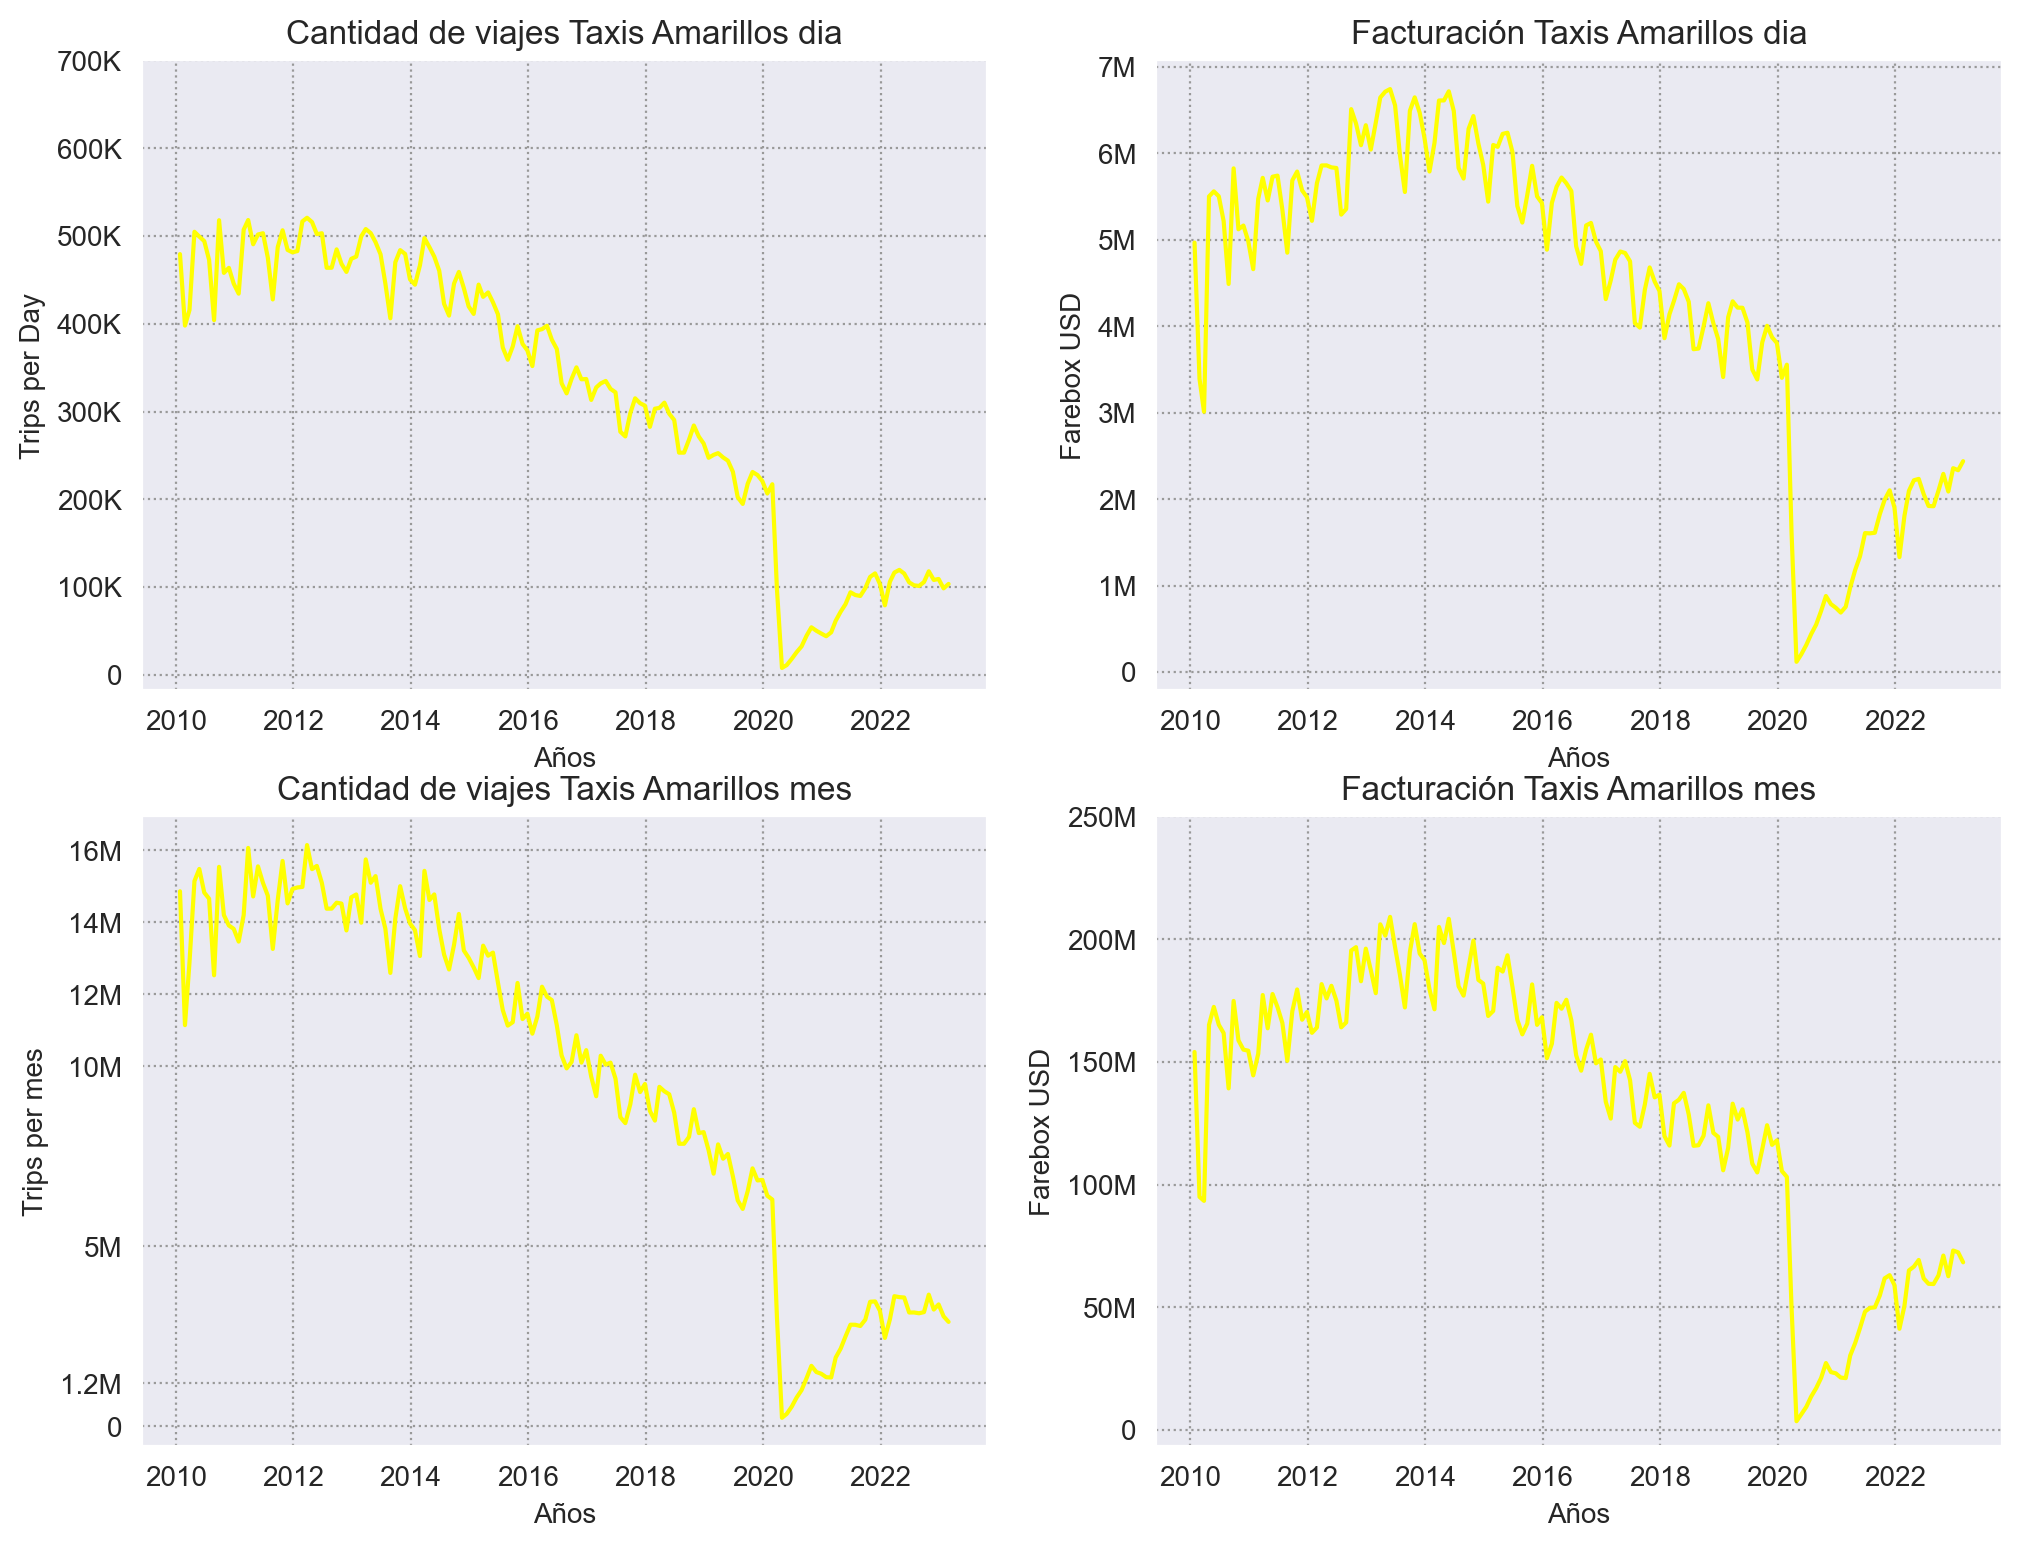

In [124]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# Subplot de 2*2
fig, ax = plt.subplots(2, 2, figsize=(12, 9), dpi=200)

# Grafica 1
sns.lineplot(x='month_date', y='trips_per_day', data=yellow_cabs,
             color='yellow', markers=True, ax=ax[0,0])

# etiquetas & ejes
ax[0,0].set_xlabel('Años')
ax[0,0].set_ylabel('Trips per Day')
ax[0,0].set_title('Cantidad de viajes Taxis Amarillos dia')

# establecer etiquetas personalizadas en el eje y
yticklabels =['0', '100K','200K','300K', '400K','500K', '600K', '700K']
yticks = [0, 1e5,2e5, 3e5,4e5, 5e5, 6e5,7e5]
ax[0,0].set_yticks(yticks)
ax[0,0].set_yticklabels(yticklabels)

# Grafica 2
sns.lineplot(x='month_date', y='farebox_per_day', data=yellow_cabs,
             color='yellow', markers=True, ax=ax[0,1])

# etiquetas & ejes
ax[0,1].set_xlabel('Años')
ax[0,1].set_ylabel('Farebox USD')
ax[0,1].set_title('Facturación Taxis Amarillos dia')

# establecer etiquetas personalizadas en el eje y
yticklabels_1 =['0', '1M','2M','3M', '4M','5M', '6M', '7M']
yticks_1 = [0, 1e6,2e6, 3e6,4e6, 5e6, 6e6,7e6]
ax[0,1].set_yticks(yticks_1)
ax[0,1].set_yticklabels(yticklabels_1)

# Grafica 3
sns.lineplot(x='month_date', y='trips_per_month', data=yellow_cabs,
             color='yellow', markers=True, ax=ax[1,0])

# etiquetas & ejes
ax[1,0].set_xlabel('Años')
ax[1,0].set_ylabel('Trips per mes')
ax[1,0].set_title('Cantidad de viajes Taxis Amarillos mes')

# establecer etiquetas personalizadas en el eje y
yticklabels_2 =['0','1.2M', '5M', '10M','12M','14M','16M']
yticks_2 =      [0, 0.12e7, 0.5e7, 1e7, 1.2e7, 1.4e7, 1.6e7]
ax[1,0].set_yticks(yticks_2)
ax[1,0].set_yticklabels(yticklabels_2)

# Grafica 4
sns.lineplot(x='month_date', y='farebox_per_month', data=yellow_cabs,
             color='yellow', markers=True, ax=ax[1,1])

# etiquetas & ejes
ax[1,1].set_xlabel('Años')
ax[1,1].set_ylabel('Farebox USD')
ax[1,1].set_title('Facturación Taxis Amarillos mes')

# establecer etiquetas personalizadas en el eje y
yticklabels_3 =['0', '50M', '100M','150M','200M', '250M']
yticks_3 =     [0, 0.5e8, 1e8, 1.5e8, 2e8, 2.5e8]
ax[1,1].set_yticks(yticks_3)
ax[1,1].set_yticklabels(yticklabels_3)


plt.show()

Matriz de correlación

<AxesSubplot:>

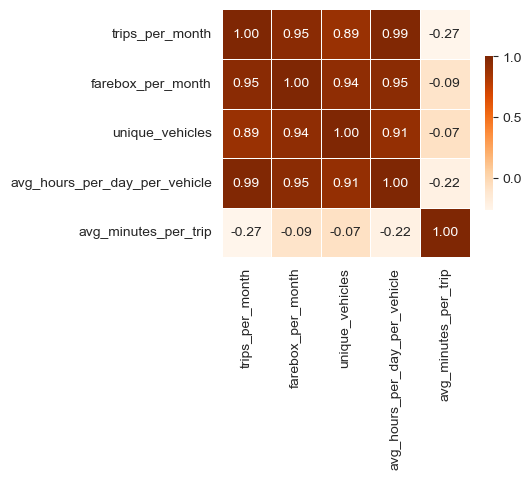

In [131]:
Y = yellow_cabs[['trips_per_month','farebox_per_month','unique_vehicles','avg_hours_per_day_per_vehicle','avg_minutes_per_trip']]
corr_matrix = Y.corr(method='pearson')

fig, ax = plt.subplots(figsize = (4,4))

sns.heatmap(corr_matrix, cmap="Oranges",  square = True, linewidths = 0.5, 
            cbar_kws = {"shrink": 0.5}, annot= True,fmt='.2f')



